In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2764,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2765,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2766,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

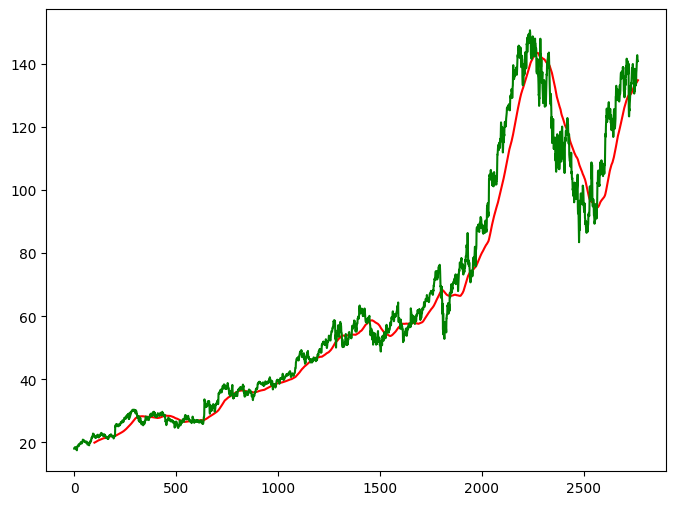

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

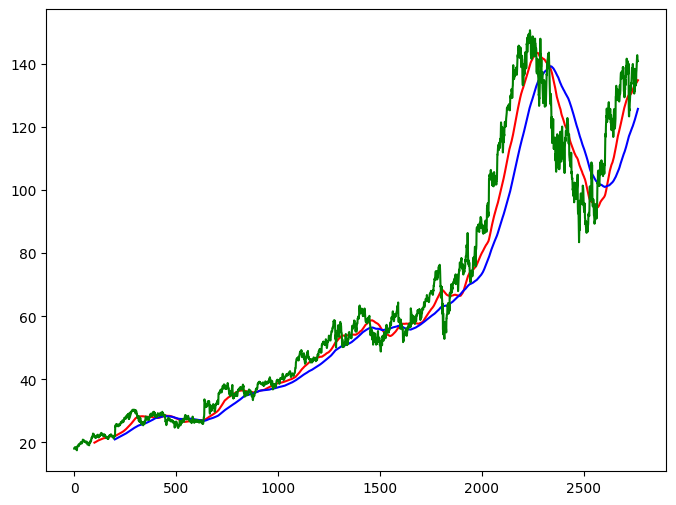

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2214

In [13]:
data_test.shape[0]

554

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
type(((x.shape[1],1)))

tuple

In [24]:
import keras
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [38]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [25]:
model = Sequential()

model.add(Input(shape=(x.shape[1],1)))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - loss: 0.0420
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0042
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0051
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0046
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0033
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0030
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0028
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0029
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0045
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0035
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0021
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0023
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0024
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0031
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - 

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
pas_100_days = data_train.tail(100)

In [30]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [31]:
data_test_scale  =  scaler.fit_transform(data_test)

In [32]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


In [34]:
scale =1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

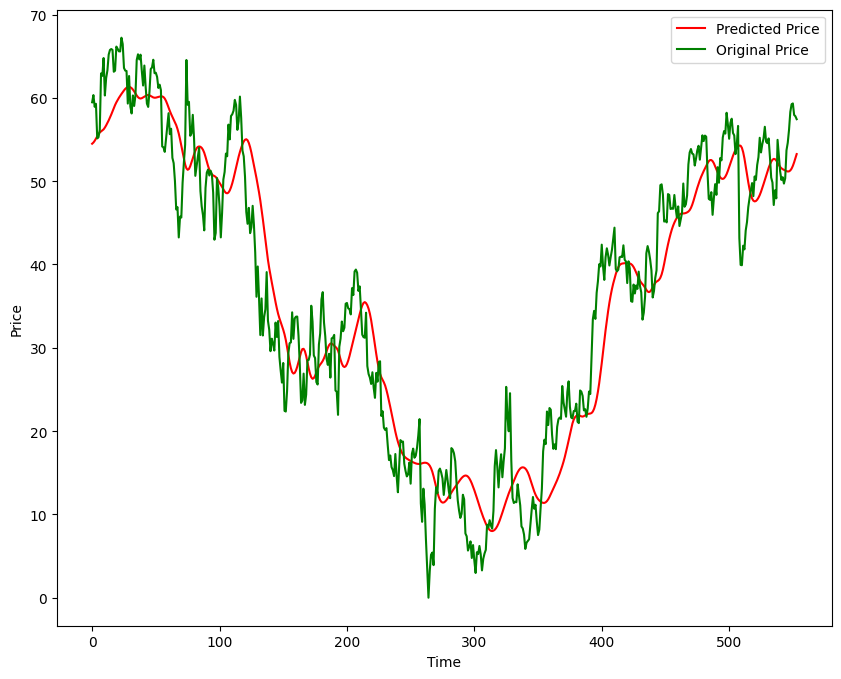

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Predictions Model.keras')